# Projeto Parcial Ciência de Dados (N1)

| Nome | RA |
| ---- | -- |
| Enzo Ferroni | 10417100 |
| Luiz Gabriel Profirio Mendes | 10382703 |



## Escolha dos Modelos

---

* ### Regressão Linear  
A Regressão Linear foi escolhida por ser um modelo simples, direto e interpretável, capaz de estimar relações entre variáveis numéricas de forma eficiente. Neste projeto, ela foi utilizada para prever duas características sonoras das músicas: dançabilidade (danceability_%) e energia (energy_%), com base em outros atributos objetivos do áudio. A principal vantagem da Regressão Linear está na facilidade de identificar o impacto individual de cada variável preditora sobre o valor previsto, o que contribui para uma compreensão mais clara dos fatores que influenciam cada uma dessas características. Além disso, trata-se de um modelo com baixo custo computacional e adequado como linha de base para comparação com outras abordagens.

* ### KNN  
O modelo K-Nearest Neighbors Regressor foi selecionado por sua abordagem baseada em similaridade. Ele realiza previsões considerando a média das observações mais próximas no espaço das variáveis, o que o torna adequado para identificar padrões locais e relações não lineares. Assim como a Regressão Linear, o KNN foi aplicado na predição das variáveis danceability_% e energy_%. Para melhorar seu desempenho, foi realizada uma varredura de valores de k, analisando o comportamento do modelo em relação às métricas MAE, RMSE e R² para diferentes configurações. Isso permitiu escolher o valor de k mais adequado com base em resultados empíricos. A comparação entre os dois modelos permite avaliar se as variáveis sonoras apresentam relações mais bem explicadas por padrões lineares globais ou por agrupamentos locais de similaridade.

## Pré-processamento básico

---

In [ ]:
# Importa bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Lê CSV
df = pd.read_csv("spotify-2023.csv", encoding="latin1")
# Foi necessário usar o 'encoding' no bloco acima pois estava com o erro
# UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7250-7251: invalid continuation byte


In [ ]:
# Exibe algumas informações básicas sobre o dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Existem alguns valores null para a coluna 'key'. Visualizaremos os valores que aparecem em key para saber se os valors realmente condizem com o que é esperado e, em seguida, removeremos as linhas em que key é null.

In [ ]:
# Verificando os valores presentes em key
print("Value counts para a coluna 'key':")
value_counts = df['key'].value_counts()
display(value_counts)

Value counts para a coluna 'key':


key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64

In [ ]:
# Remove linhas onde key é null
df = df.dropna(subset=['key'])

# Exibe algumas informações básicas sobre o dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 858 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            858 non-null    object
 1   artist(s)_name        858 non-null    object
 2   artist_count          858 non-null    int64 
 3   released_year         858 non-null    int64 
 4   released_month        858 non-null    int64 
 5   released_day          858 non-null    int64 
 6   in_spotify_playlists  858 non-null    int64 
 7   in_spotify_charts     858 non-null    int64 
 8   streams               858 non-null    object
 9   in_apple_playlists    858 non-null    int64 
 10  in_apple_charts       858 non-null    int64 
 11  in_deezer_playlists   858 non-null    object
 12  in_deezer_charts      858 non-null    int64 
 13  in_shazam_charts      817 non-null    object
 14  bpm                   858 non-null    int64 
 15  key                   858 non-null    object


In [ ]:
# Remove colunas de serviços que não serão cobertos em nossa análise.
df = df.drop(columns=['in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts'])

# Exibe algumas informações básicas sobre o dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 858 entries, 0 to 952
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            858 non-null    object
 1   artist(s)_name        858 non-null    object
 2   artist_count          858 non-null    int64 
 3   released_year         858 non-null    int64 
 4   released_month        858 non-null    int64 
 5   released_day          858 non-null    int64 
 6   in_spotify_playlists  858 non-null    int64 
 7   in_spotify_charts     858 non-null    int64 
 8   streams               858 non-null    object
 9   bpm                   858 non-null    int64 
 10  key                   858 non-null    object
 11  mode                  858 non-null    object
 12  danceability_%        858 non-null    int64 
 13  valence_%             858 non-null    int64 
 14  energy_%              858 non-null    int64 
 15  acousticness_%        858 non-null    int64 


In [ ]:
# Remove linha da música Love Grows (Where My Rosemary Goes), pois há inconsistência nos dados.
index = df[df['track_name'] == "Love Grows (Where My Rosemary Goes)"].index
df = df.drop(index)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 0 to 952
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            857 non-null    object
 1   artist(s)_name        857 non-null    object
 2   artist_count          857 non-null    int64 
 3   released_year         857 non-null    int64 
 4   released_month        857 non-null    int64 
 5   released_day          857 non-null    int64 
 6   in_spotify_playlists  857 non-null    int64 
 7   in_spotify_charts     857 non-null    int64 
 8   streams               857 non-null    object
 9   bpm                   857 non-null    int64 
 10  key                   857 non-null    object
 11  mode                  857 non-null    object
 12  danceability_%        857 non-null    int64 
 13  valence_%             857 non-null    int64 
 14  energy_%              857 non-null    int64 
 15  acousticness_%        857 non-null    int64 


A coluna streams possui um Dtype incorreto. Esperava-se um tipo int64, mas temos object. Realizaremos a conversão.

In [ ]:
# Converte streams para numérico
df['streams'] = pd.to_numeric(df['streams'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 0 to 952
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            857 non-null    object
 1   artist(s)_name        857 non-null    object
 2   artist_count          857 non-null    int64 
 3   released_year         857 non-null    int64 
 4   released_month        857 non-null    int64 
 5   released_day          857 non-null    int64 
 6   in_spotify_playlists  857 non-null    int64 
 7   in_spotify_charts     857 non-null    int64 
 8   streams               857 non-null    int64 
 9   bpm                   857 non-null    int64 
 10  key                   857 non-null    object
 11  mode                  857 non-null    object
 12  danceability_%        857 non-null    int64 
 13  valence_%             857 non-null    int64 
 14  energy_%              857 non-null    int64 
 15  acousticness_%        857 non-null    int64 


A coluna mode contém valores como "Major" e "Minor". Iremos transformar esses valores para 1 e 0, respectivamente, para tornar mais compatível com as análises que faremos.

In [ ]:
df['mode'] = df['mode'].apply(lambda x: 1 if x == 'Major' or x == '1' or x == 1 else 0)

## Implementação

---

In [ ]:
# Seleção de variáveis preditoras e variável alvo
features = ['bpm', 'energy_%', 'valence_%', 'acousticness_%',
            'instrumentalness_%', 'speechiness_%', 'liveness_%', 'mode']

X = df[features]
y = df['danceability_%']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regressão Linear

In [ ]:
# Treinamento do modelo
reg = LinearRegression()
reg.fit(X_train, y_train)

# Previsões
y_pred_lr = reg.predict(X_test)

### KNN

#### Plotando MAE, RMSE e R² para diferentes valores de K

Estratégia adotada para identificar o valor de K ideal no treinamento do modelo KNN.

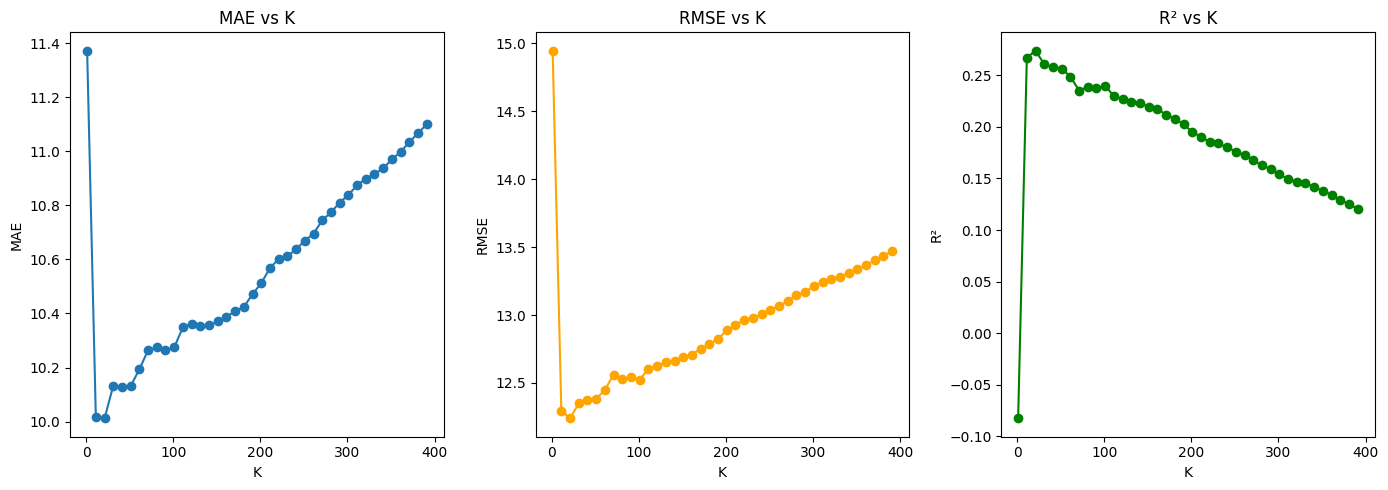

In [ ]:
# Faixa de valores de K
k_values = range(1, 401, 10)  # Testa de 1 até 400 pulando de 10 em 10

# Armazena as métricas
mae_scores = []
rmse_scores = []
r2_scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_scores.append(r2_score(y_test, y_pred))

A partir dos gráficos acima, podemos observar que um valor ideal para K está entre 10 e 30. É possível chegar a essa conclusão ao observar que MAE e RMSE possuem valores bem baixos nesse intervalo do gráfico, além de o valor R² ser alto.

In [ ]:
# Treinamento do modelo KNN
knn = KNeighborsRegressor(n_neighbors=11, weights='uniform')
knn.fit(X_train, y_train)

# Previsões
y_pred_knn = knn.predict(X_test)


## Métricas

---

In [ ]:
# Regressão Linear
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Regressão Linear:")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.2f}")

# KNN
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print("\nKNN:")
print(f"MAE: {mae_knn:.2f}")
print(f"RMSE: {rmse_knn:.2f}")
print(f"R²: {r2_knn:.2f}")


Regressão Linear:
MAE: 10.59
RMSE: 12.72
R²: 0.22

KNN:
MAE: 10.02
RMSE: 12.30
R²: 0.27


### Testando os modelos para prever a energia de uma música

In [ ]:
# Seleção de variáveis preditoras e variável alvo
features = ['bpm', 'danceability_%', 'valence_%', 'acousticness_%',
            'instrumentalness_%', 'speechiness_%', 'liveness_%', 'mode']

X = df[features]
y = df['energy_%']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Regressão Linear

In [ ]:
# Treinamento do modelo
reg = LinearRegression()
reg.fit(X_train, y_train)

# Previsões
y_pred_lr = reg.predict(X_test)

#### KNN

In [ ]:
# Treinamento do modelo KNN
knn = KNeighborsRegressor(n_neighbors=11, weights='uniform')
knn.fit(X_train, y_train)

# Previsões
y_pred_knn = knn.predict(X_test)

#### Métricas

In [ ]:
# Regressão Linear
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Regressão Linear:")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.2f}")

# KNN
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print("\nKNN:")
print(f"MAE: {mae_knn:.2f}")
print(f"RMSE: {rmse_knn:.2f}")
print(f"R²: {r2_knn:.2f}")

Regressão Linear:
MAE: 9.60
RMSE: 11.76
R²: 0.45

KNN:
MAE: 10.06
RMSE: 12.63
R²: 0.36


## Comparação

---

Os modelos de Regressão Linear e KNN Regressor foram avaliados com base nas métricas MAE, RMSE e R². Na tarefa de prever a dançabilidade, a Regressão Linear apresentou desempenho levemente superior. O modelo alcançou um MAE de 10.59, RMSE de 12.72 e R² de 0.22. O KNN Regressor obteve valores um pouco inferiores, com MAE de 10.71, RMSE de 13.21 e R² de 0.15. Esses resultados indicam que a Regressão Linear teve melhor desempenho na tarefa, ainda que a capacidade explicativa geral dos modelos tenha sido limitada.

Na tarefa adicional de prever a energia da música (energy_%), os resultados mostraram ganhos consideráveis para ambos os modelos, especialmente para a Regressão Linear. Nesse caso, a Regressão Linear obteve um MAE de 9.60, um RMSE de 11.76 e um R² de 0.45, indicando uma melhora significativa na capacidade de explicação da variabilidade da variável alvo. O KNN também teve desempenho superior ao observado na tarefa anterior, com MAE de 10.06, RMSE de 12.63 e R² de 0.36, mas ainda ficou atrás da Regressão Linear.

De forma geral, a Regressão Linear apresentou resultados mais estáveis e precisos nas duas tarefas. Já o KNN Regressor, mesmo após ajuste do parâmetro k, mostrou ser mais sensível à dispersão dos dados e obteve desempenho inferior. Isso reforça a ideia de que as relações entre os atributos sonoros e as variáveis alvo analisadas são em grande parte lineares, o que favorece o uso de modelos como a Regressão Linear.

## Conclusão preliminar

---

Com base nos resultados obtidos, a Regressão Linear apresentou desempenho superior ao KNN Regressor tanto na tarefa de prever a dançabilidade quanto na de prever a energia das músicas. Na predição da dançabilidade, a Regressão Linear alcançou um MAE de 10.59, um RMSE de 12.72 e um R² de 0.22, enquanto o KNN Regressor obteve um MAE de 10.71, RMSE de 13.21 e R² de 0.15. Na predição da variável energy_%, os resultados foram ainda mais favoráveis à Regressão Linear, com MAE de 9.60, RMSE de 11.76 e R² de 0.45, contra MAE de 10.06, RMSE de 12.63 e R² de 0.36 no modelo KNN.

Esses números reforçam que, para o conjunto de dados utilizado, as relações entre características sonoras como BPM, valência, acústica e modo com variáveis como dançabilidade e energia são melhor modeladas por relações lineares globais. A Regressão Linear demonstrou ser mais eficaz, estável e precisa na captura dessas relações.

Portanto, conclui-se que a Regressão Linear foi o modelo mais adequado entre os dois testados, não apenas por sua simplicidade, mas por seu desempenho superior em ambas as tarefas realizadas.
